# K Means

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Initializing and previewing data for testing.

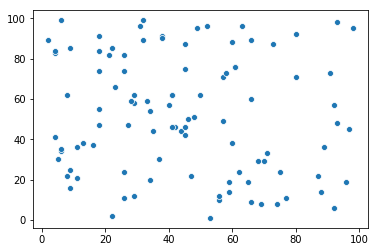

In [2]:
x = np.random.randint(1, 100, 100)
y = np.random.randint(1, 100, 100)

sns.scatterplot(x=x, y=y)
plt.show()

In [3]:
data = np.array([x,y])

In [4]:
def euclidian(a, b):
    return np.linalg.norm(a - b, axis=0)


class KMeans():
    def __init__(self, k):
        self.k = k
        self.centroids = {}
        self.past_centroids = {}
        self.clusters = {}
        self.max_iter = 200
        
        for i in range(k):                                                                           # Initializing random centroids
            self.centroids[i] = [np.random.randint(1, 100), np.random.randint(1, 100)]
        
        print(f'Initial centroids: {self.centroids}')
        
    def train(self, data):          
        for i in range(self.max_iter):
            self.classifications = {}

            for k in range(self.k):
                # Creating a dictionary to assign data points to a centroid
                self.classifications[k] = []

            for point in range(data.shape[1]):
                # Finding distance to each centroid
                distances = [euclidian(data[:,point], self.centroids[x]) for x in self.centroids]
                
                # Assigning point to closest centroid
                closest_cent = distances.index(min(distances))          
                
                # Updating dictionary
                self.classifications[closest_cent].append(data[:,point])

            # Updating past centroids dictionary
            self.past_centroids[i] = [self.centroids[i] for i in self.centroids]

            # Updating centroid position
            for centroid in self.classifications:
                self.centroids[centroid] = np.average(self.classifications[centroid], axis=0)
            
                    
                
        

kmeans = KMeans(5)
kmeans.train(data)
print(kmeans.centroids)

Initial centroids: {0: [11, 64], 1: [56, 80], 2: [87, 88], 3: [53, 54], 4: [94, 94]}
{0: array([25.60606061, 37.54545455]), 1: array([24.04166667, 81.375     ]), 2: array([91.75 , 30.875]), 3: array([63.55555556, 19.94444444]), 4: array([68.11764706, 82.23529412])}


# Visualizing Grouping

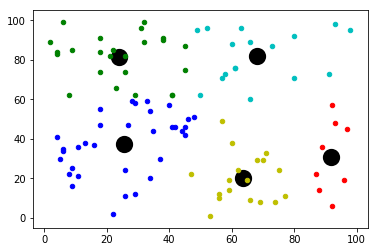

In [5]:
for centroid in kmeans.centroids:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

color = ['b', 'g', 'r', 'y', 'c']
for i in kmeans.classifications:
    for point in kmeans.classifications[i]:
        plt.scatter(point[0], point[1], color=color[i], s=20)
        
plt.show()